In [1]:
import pandas as pd 
from matplotlib import pyplot as plt

In [2]:
solardata = pd.read_csv('Plant_1_Generation_Data.csv')

solardata["DATE_TIME"] = pd.to_datetime(solardata['DATE_TIME'], format='%d-%m-%Y %H:%M')
solardata = solardata.set_index("DATE_TIME")
solardata.head()

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,,
2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [3]:
solardata.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


In [4]:
solardata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 68778 entries, 2020-05-15 00:00:00 to 2020-06-17 23:45:00
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PLANT_ID     68778 non-null  int64  
 1   SOURCE_KEY   68778 non-null  object 
 2   DC_POWER     68778 non-null  float64
 3   AC_POWER     68778 non-null  float64
 4   DAILY_YIELD  68778 non-null  float64
 5   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 3.7+ MB


Text(0, 0.5, 'DC POWER (kW)')

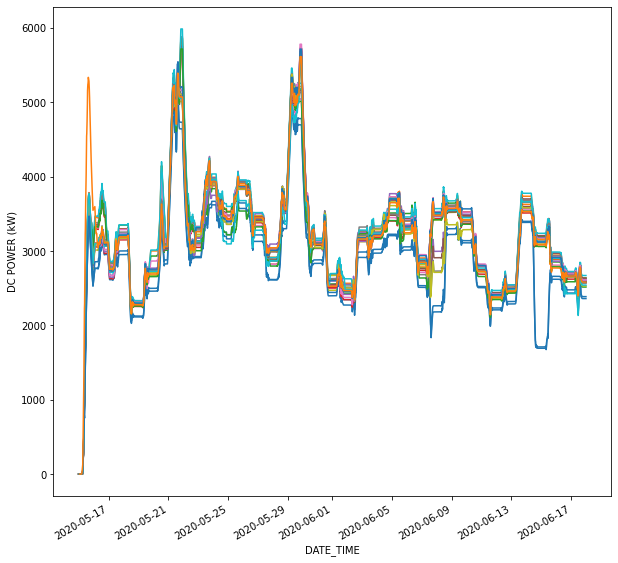

In [5]:
inverters = solardata['SOURCE_KEY'].unique()
fig, ax = plt.subplots(figsize=(10, 10))

# loop over each inverter, plot dc power 
for inverter in inverters:
    # extract dc power from solar data
    dc_power = solardata[solardata['SOURCE_KEY'] == inverter]['DC_POWER']

    # window dc power over day
    dc_power = dc_power.rolling(window = '1D').mean()

    # plot dc power
    dc_power.plot(ax = ax)

ax.set_ylabel("DC POWER (kW)")


array([[<AxesSubplot:title={'center':'AC_POWER'}>,
        <AxesSubplot:title={'center':'DC_POWER'}>]], dtype=object)

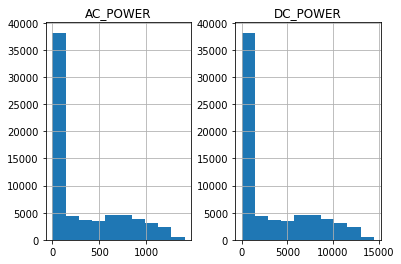

In [7]:
# display power in a hist 
solardata[['AC_POWER', 'DC_POWER']].hist()

Text(0, 0.5, 'AC POWER (kW)')

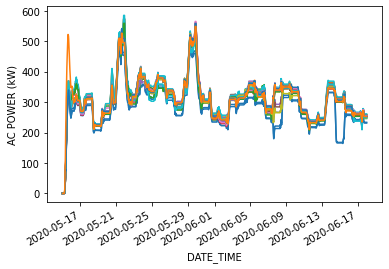

In [11]:
inverters = solardata['SOURCE_KEY'].unique()
fig, ax = plt.subplots()

# loop over each inverter, plot dc power 
for inverter in inverters:
    # extract dc power from solar data
    ac_power = solardata[solardata['SOURCE_KEY'] == inverter]['AC_POWER']

    # window dc power over day
    ac_power = ac_power.rolling(window = '1D').mean()

    # plot dc power
    ac_power.plot(ax = ax)

ax.set_ylabel("AC POWER (kW)")

Text(0, 0.5, 'DC / AC POWER RATIO')

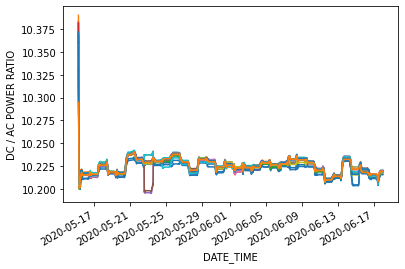

In [16]:
inverters = solardata['SOURCE_KEY'].unique()
fig, ax = plt.subplots()

# loop over each inverter, plot dc power 
for inverter in inverters:
    # extract power from solar data
    ac_power = solardata[solardata['SOURCE_KEY'] == inverter]['AC_POWER']
    dc_power = solardata[solardata['SOURCE_KEY'] == inverter]['DC_POWER']

    # window power over day
    ac_power = ac_power.rolling(window = '1D').mean()
    dc_power = dc_power.rolling(window = '1D').mean()

    # define dc over ac
    dcac = dc_power / ac_power
    # plot dc power
    dcac.plot(ax = ax)

ax.set_ylabel("DC / AC POWER RATIO")
